In [451]:
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [452]:
(images,labels)=loadmnist("train-images-idx3-ubyte", "train-labels-idx1-ubyte")

In [453]:
images.shape

(60000, 784)

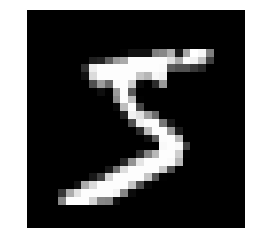

In [454]:
displaychar(images[0])

In [455]:
import pandas as pd

In [456]:
train_images_cov = np.cov(images, rowvar=False)

In [457]:
train_images_cov.shape

(784, 784)

In [458]:
eigen_values = np.linalg.eigh(train_images_cov)[0]
eigen_vectors = np.linalg.eigh(train_images_cov)[1]

In [459]:
Overall_variance = sum(eigen_values)

In [460]:
Overall_variance

3428502.5747802034

In [461]:
k = [200, 150, 100, 50, 25]
F = []

for i in range(len(k)):
    F.append(sum(eigen_values[0:784-k[i]]))
    print 'Fraction of lost information for k = ',k[i],'\tF_',k[i],'\t= ',F[i]/Overall_variance

Fraction of lost information for k =  200 	F_ 200 	=  0.0335526522989
Fraction of lost information for k =  150 	F_ 150 	=  0.0516435811854
Fraction of lost information for k =  100 	F_ 100 	=  0.0853714275605
Fraction of lost information for k =  50 	F_ 50 	=  0.175353136667
Fraction of lost information for k =  25 	F_ 25 	=  0.3081950912


In [462]:
k = [200, 150, 100, 50, 25]
F_digit_j = {}
for i in range(10):
    digit_images = images[np.where(labels==i)[0]]
    digit_images_cov = np.cov(digit_images, rowvar=False)
    digit_eigen_values = np.linalg.eigh(digit_images_cov)[0]
    digit_eigen_vectors = np.linalg.eigh(digit_images_cov)[1]
    Overall_digit_variance = sum(digit_eigen_values)
    
    F = []
    for j in range(len(k)):
        projected_eigen_value_sum = sum(digit_eigen_values[0:784-k[j]])
        F.append(projected_eigen_value_sum/Overall_digit_variance)
    
    F_digit_j.update(pd.DataFrame(F, index=['200', '150', '100', '50', '25'], columns=['digit '+str(i)]))

F_digit_j = pd.DataFrame(F_digit_j)
F_digit_j

,digit 0,digit 1,digit 2,digit 3,digit 4,digit 5,digit 6,digit 7,digit 8,digit 9
200,0.020953,0.006705,0.028351,0.026178,0.025570,0.023850,0.019147,0.021417,0.025176,0.017133
150,0.034483,0.014854,0.046034,0.043591,0.042653,0.040013,0.032724,0.036308,0.043149,0.031037
100,0.059464,0.030986,0.078518,0.076171,0.073684,0.070948,0.057947,0.063601,0.077166,0.057647
50,0.119590,0.073012,0.161913,0.159073,0.148018,0.149749,0.122372,0.128934,0.167942,0.123549
25,0.207508,0.131318,0.284332,0.275770,0.253226,0.263515,0.222986,0.222289,0.300042,0.225424


In [463]:
print "Digit which is most amenable to low dimensional projection :",F_digit_j.loc['25'].idxmin()

Digit which is most amenable to low dimensional projection : digit 1


# Pick a random instance of the digit. Show the original digit as well as its reconstruction for k = [200, 150, 100, 50, 25]

Original Digit



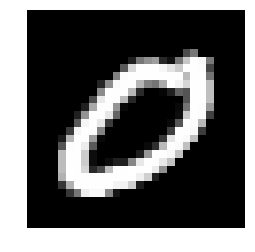

K =  200


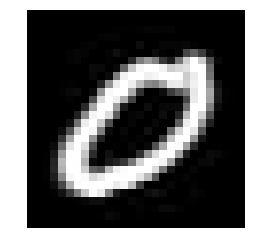

K =  150


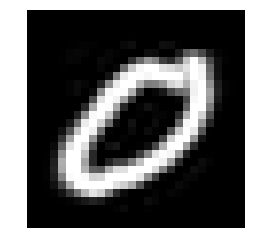

K =  100


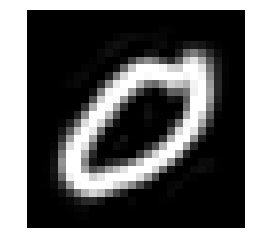

K =  50


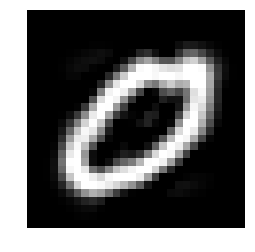

K =  25


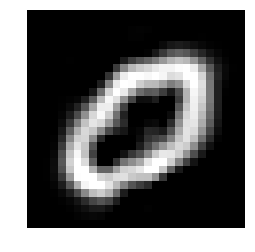

Original Digit



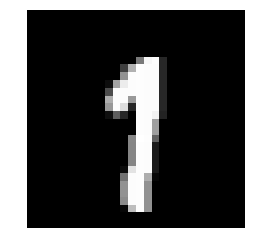

K =  200


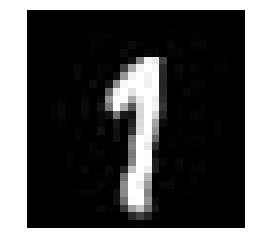

K =  150


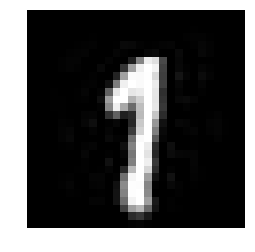

K =  100


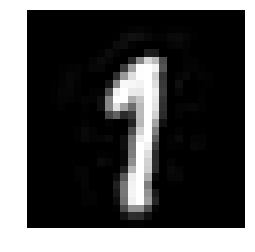

K =  50


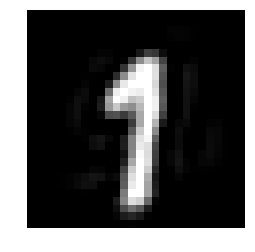

K =  25


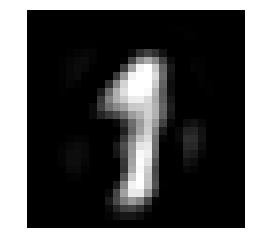

Original Digit



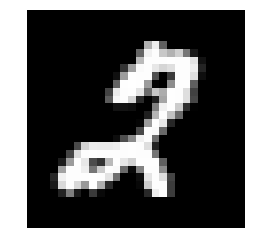

K =  200


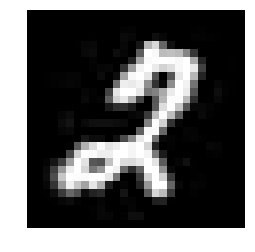

K =  150


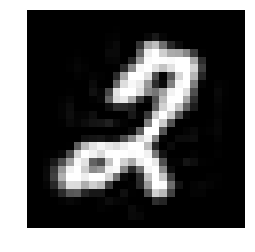

K =  100


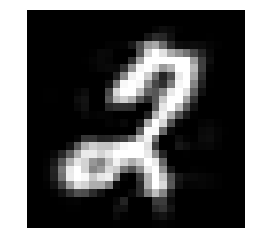

K =  50


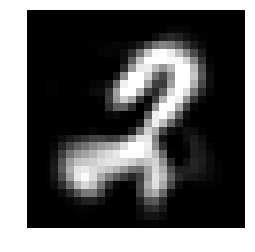

K =  25


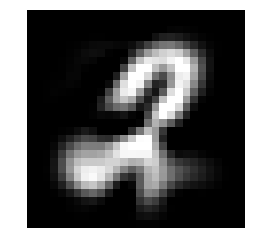

Original Digit



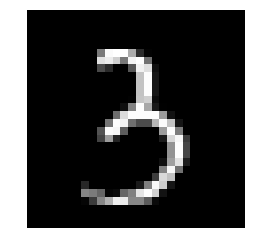

K =  200


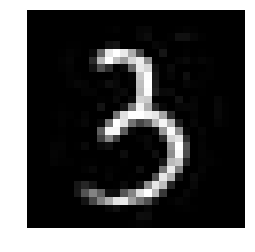

K =  150


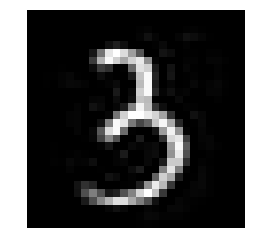

K =  100


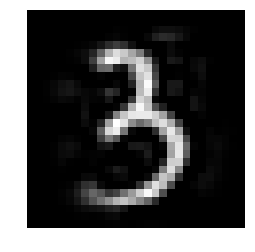

K =  50


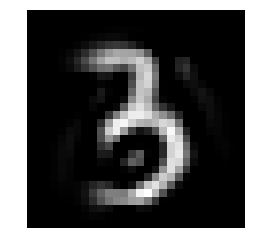

K =  25


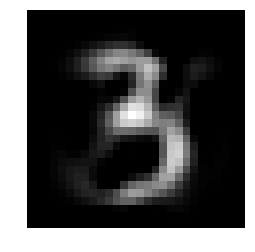

Original Digit



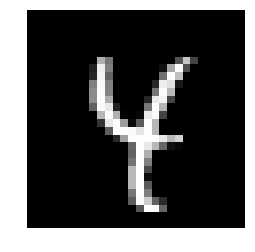

K =  200


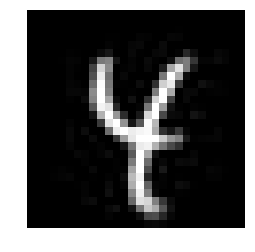

K =  150


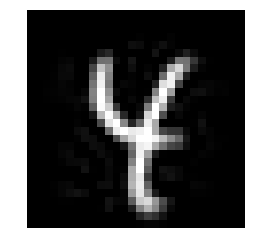

K =  100


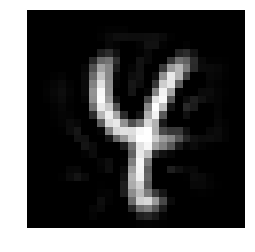

K =  50


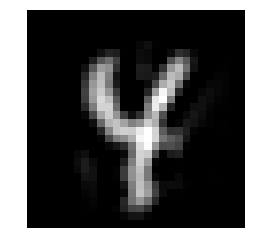

K =  25


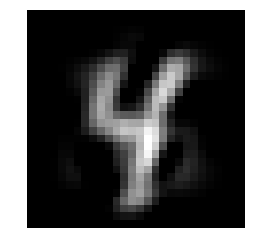

Original Digit



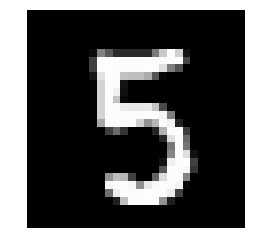

K =  200


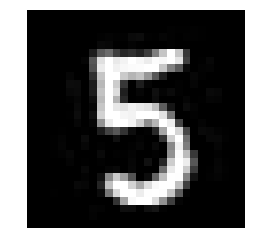

K =  150


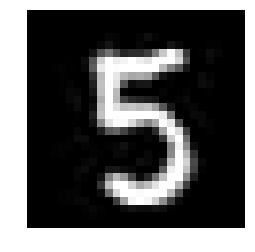

K =  100


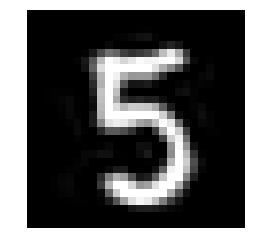

K =  50


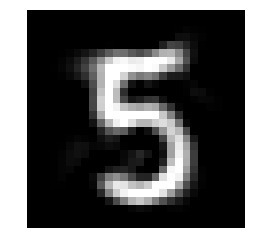

K =  25


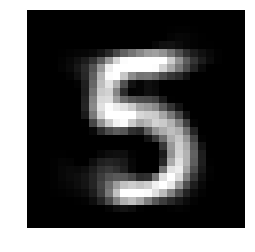

Original Digit



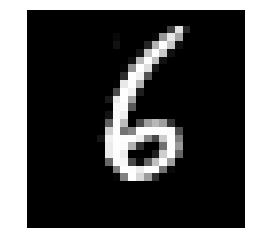

K =  200


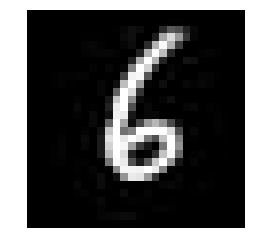

K =  150


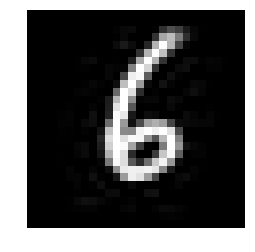

K =  100


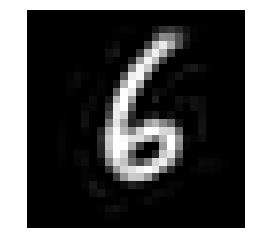

K =  50


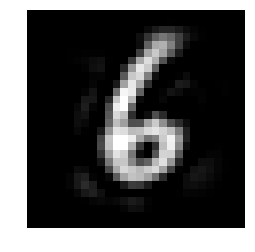

K =  25


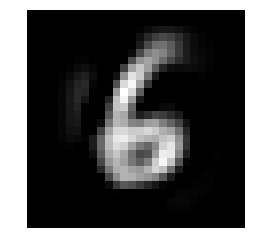

Original Digit



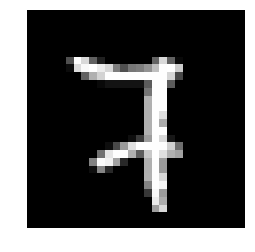

K =  200


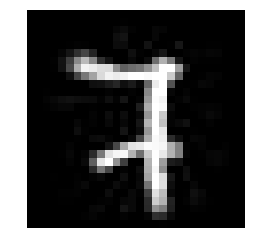

K =  150


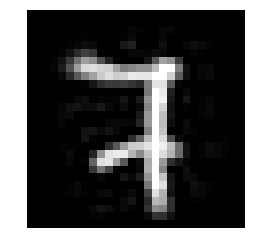

K =  100


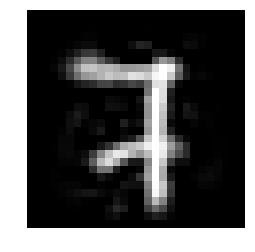

K =  50


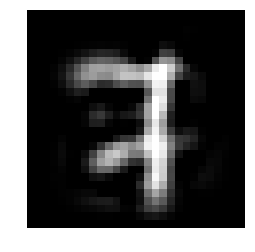

K =  25


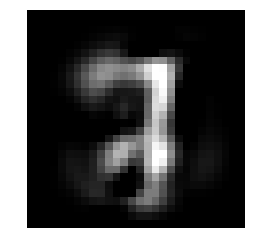

Original Digit



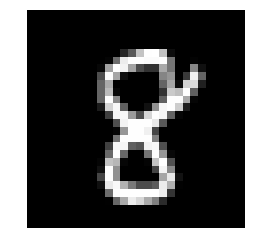

K =  200


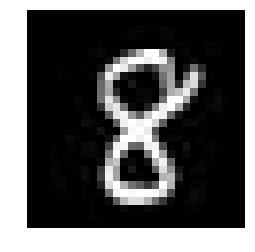

K =  150


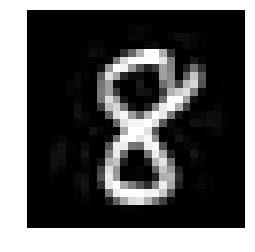

K =  100


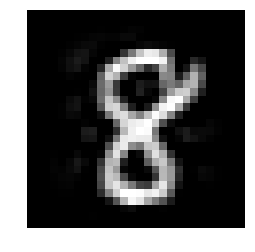

K =  50


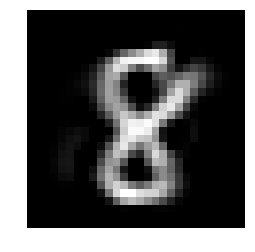

K =  25


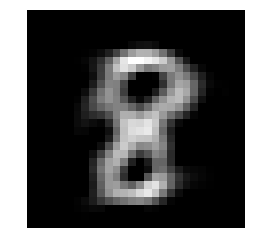

Original Digit



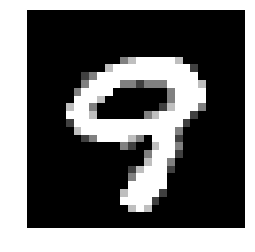

K =  200


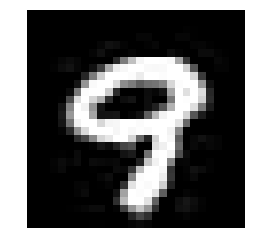

K =  150


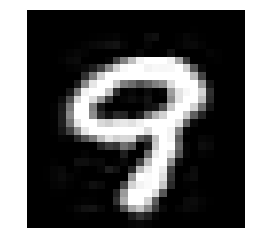

K =  100


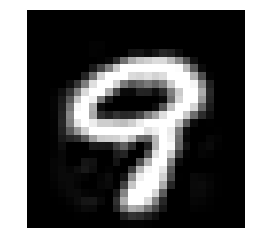

K =  50


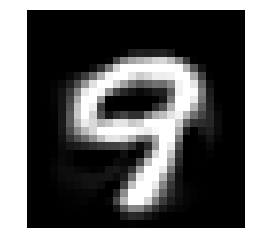

K =  25


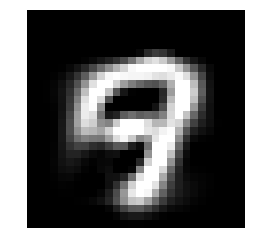

In [466]:
import random

for i in range(10):
    random_digit = i

    k = [200, 150, 100, 50, 25]

    digit = images[np.where(labels==random_digit)[0]]
    digit_cov = np.cov(digit, rowvar=False)
    digit_eigen_values = np.linalg.eigh(digit_cov)[0]
    digit_eigen_vectors = np.linalg.eigh(digit_cov)[1]

    random_digit_instance = digit[random.randint(0,len(digit)-1)]
    print "Original Digit\n"
    displaychar(random_digit_instance)

    for k in k:
        projected_eigen_vectors = eigen_vectors[:,784-k:784]
        projected_digit = np.dot(random_digit_instance, projected_eigen_vectors)
        Reconstructed_digit = np.dot(projected_digit,projected_eigen_vectors.T)
        for i in range(784):
            if Reconstructed_digit[i]<0:
                Reconstructed_digit[i] = 0
            elif Reconstructed_digit[i]>255:
                Reconstructed_digit[i] = 255
        print "K = ",k
        displaychar(Reconstructed_digit)